In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
data=pd.read_excel("C:\\Users\\Qaseem Shahid\\Desktop\\data_.xlsx")
data.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [7]:
data.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42y,43,20.879744,82.002744,6.502985,202.935536,rice
1,85z,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44p,23.004459,82.320763,7.840207,263.964248,rice
3,74s,35h,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [8]:
data.tail()

,N,P,K,temperature,humidity,ph,rainfall,label
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,not
2199,104,18,30,23.603016,60.396475,6.779833,140.937041,coffee


In [9]:
data.shape

(2200, 8)

In [10]:
data.describe()

,temperature,humidity,ph,rainfall
count,2199.000000,2199.000000,2199.000000,2199.000000
mean,25.614632,71.476589,6.469246,103.490560
std,5.064335,22.267545,0.774036,54.956396
min,8.825675,14.258040,3.504752,20.211267
25%,22.768393,60.255364,5.971573,64.563449
50%,25.597049,80.471527,6.424671,94.953353
75%,28.560654,89.960531,6.922752,124.308842
max,43.675493,99.981876,9.935091,298.560117


In [11]:
data.nunique()

N               142
P               121
K                77
temperature    2199
humidity       2199
ph             2199
rainfall       2199
label            24
dtype: int64

In [12]:
data["label"].unique()

array(['rice', 'n.a.', 'not', 'maize', 'chickpea', 'kidneybeans',
       'pigeonpeas', 'mothbeans', 'mungbean', 'blackgram', 'lentil',
       'pomegranate', 'banana', 'mango', 'grapes', 'watermelon',
       'muskmelon', 'apple', 'orange', 'papaya', 'coconut', 'cotton',
       'jute', 'coffee'], dtype=object)

In [13]:
data.isnull().sum()

N              0
P              0
K              0
temperature    1
humidity       1
ph             1
rainfall       1
label          0
dtype: int64

In [14]:
dt=pd.read_excel("C:\\Users\\Qaseem Shahid\\Desktop\\data_.xlsx",na_values= ["not","n.a."])
dt.isnull().sum()

N               0
P               0
K               0
temperature     1
humidity        1
ph              1
rainfall        1
label          22
dtype: int64

In [15]:
d=dt.interpolate()
d

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42y,43,20.879744,82.002744,6.502985,202.935536,rice
1,85z,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44p,23.004459,82.320763,7.840207,263.964248,rice
3,74s,35h,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,NaN


In [16]:
a=d.fillna(method="ffill")

In [17]:
a.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [144]:
new_data=a.replace({"N":"[A-Za-z]","P":"[A-Za-z]","K":"[A-Za-z]","temperature":"[A-Za-z]","humidity":"[A-Za-z]","ph":"[A-Za-z]","rainfall":"[A-Za-z]"},"",regex= True)

In [145]:
new_data

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


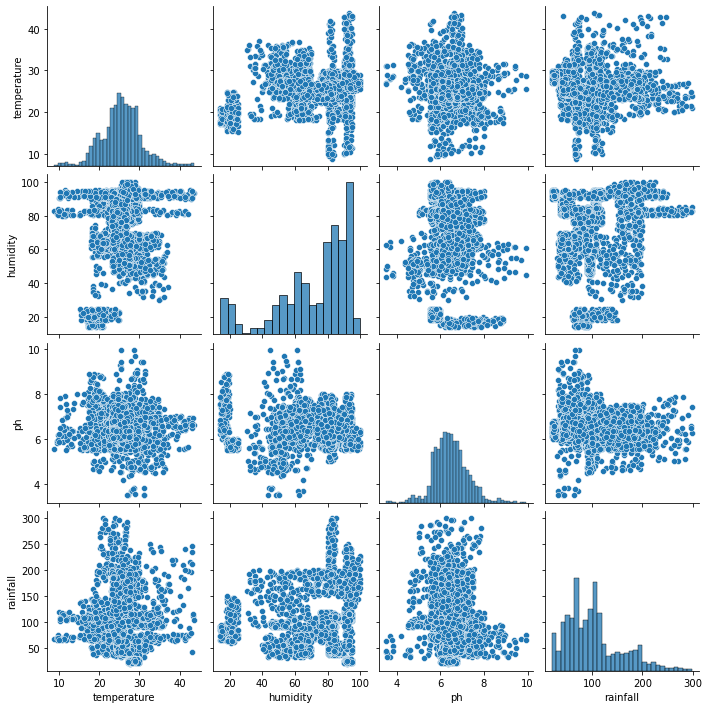

In [146]:
sns.pairplot(new_data)

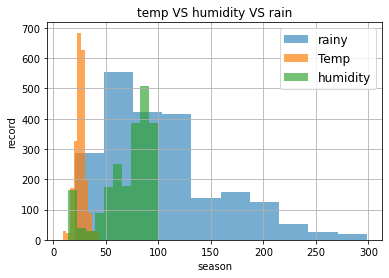

In [132]:
plt.hist(new_data["rainfall"],bins=10,label = "rainy",alpha=0.6)
plt.hist(new_data["temperature"],bins=10,label="Temp",alpha = 0.7)
plt.hist(new_data["humidity"],bins=10,label="humidity", alpha = 0.65)
plt.xlabel("season")
plt.ylabel("record")
plt.title("temp VS humidity VS rain")
plt.legend(loc= "best", fontsize="large")
plt.grid()

In [128]:
new_data.to_csv("C:\\Users\\Qaseem Shahid\\Desktop\\data.csv",index= False)